In [1]:
from bs4 import BeautifulSoup
import requests
import re

In [2]:
url = "https://www.cybersecurity-insiders.com/list-of-countries-which-are-most-vulnerable-to-cyber-attacks/"

In [3]:
header_url = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36'}

In [4]:
data = requests.get(url, headers=header_url)

In [5]:
data

<Response [200]>

In [6]:
soup = BeautifulSoup(data.content,'html.parser')

In [7]:
print(soup.prettify())

<!DOCTYPE doctype html >
<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-US" prefix="og: http://ogp.me/ns#">
 <!--<![endif]-->
 <head>
  <title>
   List of Countries which are most vulnerable to Cyber Attacks - Cybersecurity Insiders
  </title>
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="" rel="pingback"/>
  <script id="wpuf-language-script" type="text/javascript">
   var error_str_obj = {
                    'required' : 'is required',
                    'mismatch' : 'does not match',
                    'validation' : 'is not valid'
                }
  </script>
  <meta content="https://www.cybersecurity-insiders.com/wp-content/uploads/2017/03/Vulnerability_1000x600-4.jpg" property="og:image">
   <link href="https://www.cybersecurity-in

In [8]:
corpus = soup.find_all('p')

In [9]:
test_data = corpus[5:23:1]

In [10]:
list_index = [ 0,2,4,7,9,11,13,15,17 ]
ex_data=[]
ex_data_new=[]

In [11]:
#Got the list of countries in ex_data 
for i in list_index:
    ex_data.append(test_data[i])

In [12]:
for names in ex_data:
    ex_data_new.append(names.get_text())

In [13]:
ex_data_1=[]
ex_data_2=[]

In [14]:
for i in range(0,5):
    ex_data_1.append(re.split("-|%",ex_data_new[i]))

In [15]:
for i in range(0,5):
    ex_data_2.append(ex_data_1[i][::2])

In [16]:
ex_data_2

[['Sweden',
  'Finland',
  'Norway',
  'Japan',
  'Belgium',
  'United Kingdom',
  'Switzerland',
  'Germany',
  'Denmark',
  'Netherlands',
  ''],
 ['China',
  'Taiwan',
  'Turkey',
  'Russia',
  'Gautamela',
  'Mexico',
  'Peru',
  'Ecuador',
  'Brazil',
  'Poland',
  ''],
 ['India',
  'Russian Federation',
  'Kazakhstan',
  'Italy',
  'Germany',
  'Vietnam',
  'Algeria',
  'Brazil',
  'Ukraine',
  'United States',
  ''],
 ['China',
  'United States',
  'United Kingdom',
  'France',
  'Korea',
  'Singapore',
  'Japan',
  'Vietnam',
  'Germany',
  ''],
 ['United States',
  'South Korea',
  'Japan',
  'Russia',
  'Columbia, Ukraine',
  'Vietnam, Belarus, Kazakhstan and Phillippnes',
  '']]

In [17]:
flat_list = [item for sublist in ex_data_2 for item in sublist]

In [18]:
flat_list = list(filter(None, flat_list))

In [19]:
ex_data_3 = re.split(",|and",flat_list[-1])

In [20]:
ex_data_4 = re.split(",",flat_list[-2])

In [21]:
new_list = [flat_list[0:-2],ex_data_3,ex_data_4]

In [22]:
new_list

[['Sweden',
  'Finland',
  'Norway',
  'Japan',
  'Belgium',
  'United Kingdom',
  'Switzerland',
  'Germany',
  'Denmark',
  'Netherlands',
  'China',
  'Taiwan',
  'Turkey',
  'Russia',
  'Gautamela',
  'Mexico',
  'Peru',
  'Ecuador',
  'Brazil',
  'Poland',
  'India',
  'Russian Federation',
  'Kazakhstan',
  'Italy',
  'Germany',
  'Vietnam',
  'Algeria',
  'Brazil',
  'Ukraine',
  'United States',
  'China',
  'United States',
  'United Kingdom',
  'France',
  'Korea',
  'Singapore',
  'Japan',
  'Vietnam',
  'Germany',
  'United States',
  'South Korea',
  'Japan',
  'Russia'],
 ['Vietnam', ' Belarus', ' Kazakhstan ', ' Phillippnes'],
 ['Columbia', ' Ukraine']]

In [23]:
countries = [item for sublist in new_list for item in sublist]

In [24]:
countries   # the countries which suffer from cyber attacks 

['Sweden',
 'Finland',
 'Norway',
 'Japan',
 'Belgium',
 'United Kingdom',
 'Switzerland',
 'Germany',
 'Denmark',
 'Netherlands',
 'China',
 'Taiwan',
 'Turkey',
 'Russia',
 'Gautamela',
 'Mexico',
 'Peru',
 'Ecuador',
 'Brazil',
 'Poland',
 'India',
 'Russian Federation',
 'Kazakhstan',
 'Italy',
 'Germany',
 'Vietnam',
 'Algeria',
 'Brazil',
 'Ukraine',
 'United States',
 'China',
 'United States',
 'United Kingdom',
 'France',
 'Korea',
 'Singapore',
 'Japan',
 'Vietnam',
 'Germany',
 'United States',
 'South Korea',
 'Japan',
 'Russia',
 'Vietnam',
 ' Belarus',
 ' Kazakhstan ',
 ' Phillippnes',
 'Columbia',
 ' Ukraine']

In [ ]:
# part two of the program 
# to create a wordcloud out of this list 

In [25]:
!pip install wordcloud

  Running setup.py bdist_wheel for wordcloud: started
  Running setup.py bdist_wheel for wordcloud: finished with status 'done'
  Stored in directory: C:\Users\Amjee\AppData\Local\pip\Cache\wheels\d9\4c\ac\e63c45f2ce09860e9459a410953039c30296e89d9f7234675f
Successfully built wordcloud


In [35]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [27]:
hack_wc = WordCloud()

In [29]:
hack_wc.generate(', '.join(countries))

In [30]:
import matplotlib.pyplot as plt

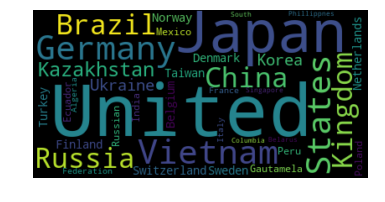

In [31]:
plt.imshow(hack_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [87]:
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%%, %d%%)" % np.random.randint(49,51))

In [88]:
hack_mask = np.array(Image.open('skeletonof.jpg'))

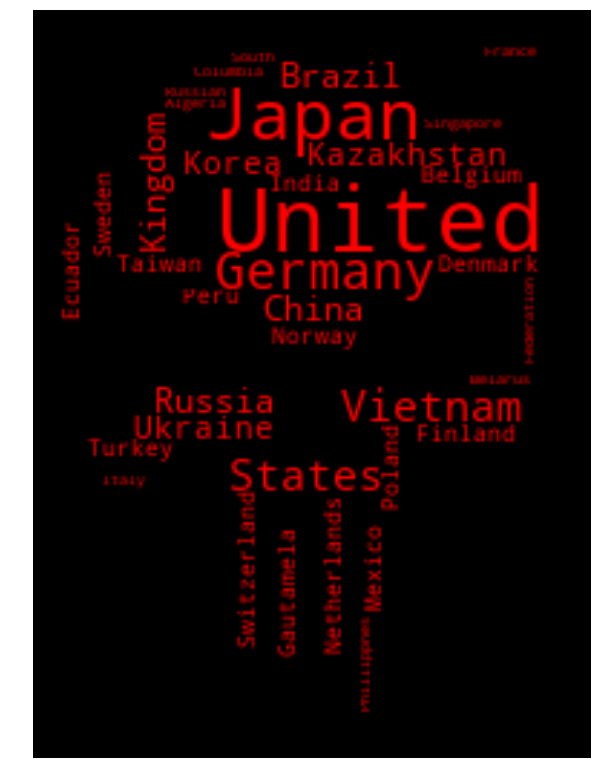

In [89]:
ha_wc = WordCloud(mask=hack_mask, background_color='black')
ha_wc.generate(', '.join(countries))
ha_wc.recolor(color_func= grey_color_func)

fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(15) # set height

plt.imshow(ha_wc, interpolation='bilinear')
plt.axis('off')
plt.show()
